In [8]:
import pandas as pd

# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')


In [9]:
# Check the number of .csv files
csv_files = ['movies.csv', 'ratings.csv', 'links.csv', 'tags.csv']
print(f'Number of CSV files: {len(csv_files)}')

Number of CSV files: 4


In [10]:
# Check the shape of the datasets
print(f'Shape of movies.csv: {movies.shape}')
print(f'Shape of ratings.csv: {ratings.shape}')

Shape of movies.csv: (9742, 3)
Shape of ratings.csv: (100836, 4)


In [11]:
unique_users = ratings['userId'].nunique()
print(f'Number of unique userId: {unique_users}')


Number of unique userId: 610


In [12]:
ratings_count = ratings.groupby('movieId').size().reset_index(name='counts')
max_ratings_movie = ratings_count[ratings_count['counts'] == ratings_count['counts'].max()]
max_ratings_movie_id = max_ratings_movie['movieId'].values[0]

# Merge with movies to get the name of the movie
max_rated_movie = movies[movies['movieId'] == max_ratings_movie_id]['title'].values[0]
print(f'Movie with maximum number of user ratings: {max_rated_movie}')


Movie with maximum number of user ratings: Forrest Gump (1994)


In [13]:
matrix_movie_id = movies[movies['title'].str.contains('Matrix, The')]['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag'].unique()
print(f'Tags for Matrix, The (1999): {matrix_tags}')


Tags for Matrix, The (1999): ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [14]:
t2_movie_id = movies[movies['title'].str.contains('Terminator 2')]['movieId'].values[0]
t2_ratings = ratings[ratings['movieId'] == t2_movie_id]['rating'].mean()
print(f'Average rating for Terminator 2: Judgment Day (1991): {t2_ratings}')

Average rating for Terminator 2: Judgment Day (1991): 3.970982142857143


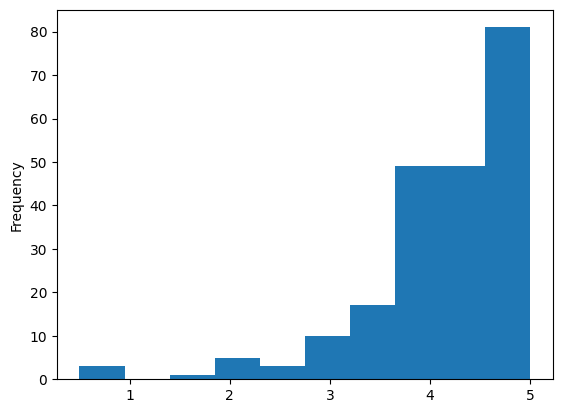

In [15]:
fight_club_id = movies[movies['title'].str.contains('Fight Club')]['movieId'].values[0]
fight_club_ratings = ratings[ratings['movieId'] == fight_club_id]['rating']
fight_club_distribution = fight_club_ratings.plot.hist(bins=10).get_figure()
fight_club_distribution.savefig('fight_club_distribution.png')


In [16]:
# Group by movieId and apply aggregation (count and mean)
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})
grouped_ratings.columns = ['count', 'mean_rating']

# Filter movies with more than 50 ratings
filtered_movies = grouped_ratings[grouped_ratings['count'] > 50]

# Merge with movies dataset
popular_movies = pd.merge(filtered_movies, movies, on='movieId')


In [17]:
most_popular_movie = popular_movies[popular_movies['mean_rating'] == popular_movies['mean_rating'].max()]
print(f'Most popular movie based on average user ratings: {most_popular_movie["title"].values[0]}')


Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


In [18]:
top_5_movies = popular_movies.sort_values(by='count', ascending=False).head(5)
print('Top 5 popular movies based on the number of user ratings:')
print(top_5_movies[['title', 'count']])


Top 5 popular movies based on the number of user ratings:
                                title  count
61                Forrest Gump (1994)    329
53   Shawshank Redemption, The (1994)    317
49                Pulp Fiction (1994)    307
99   Silence of the Lambs, The (1991)    279
248                Matrix, The (1999)    278


In [6]:
import pandas as pd

# Load the datasets
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Group by movieId and calculate the number of ratings
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

# Filter movies with more than 50 ratings
filtered_movies_df = ratings_grouped[ratings_grouped['rating_count'] > 50]

# Merge with movies and links data
filtered_movies_df = filtered_movies_df.merge(movies_df, on='movieId')
filtered_movies_df = filtered_movies_df.merge(links_df, on='movieId')

print(f"Number of movies with more than 50 ratings: {len(filtered_movies_df)}")


Number of movies with more than 50 ratings: 436


In [2]:
import requests
from bs4 import BeautifulSoup
import time

def get_imdb_reviews(imdb_id, max_reviews=10):
    reviews = []
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    review_blocks = soup.find_all('div', class_='text show-more__control', limit=max_reviews)

    for review in review_blocks:
        reviews.append(review.text.strip())

    return reviews

# Add a new column to store the reviews
filtered_movies_df['imdb_reviews'] = filtered_movies_df['imdbId'].apply(lambda x: get_imdb_reviews(str(x).zfill(7)))

# Display the first few rows to confirm that reviews are being captured
print(filtered_movies_df[['movieId', 'title', 'imdb_reviews']].head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
3        6              Heat (1995)   
4        7           Sabrina (1995)   

                                        imdb_reviews  
0  [I am a big fan of the animated movies coming ...  
1  [I have not seen this movie in more then a dec...  
2  [Some people see this as an inferior sequel to...  
3  [I have very little interest in most action fi...  
4  [Although terribly predictable and a bit too l...  


In [1]:
# Save the reviews to a CSV file
filtered_movies_df.to_csv('E:\Innomatics hackathon\movies_with_reviews.csv', index=False)



NameError: name 'filtered_movies_df' is not defined

In [4]:
# Filter for Sci-Fi movies
sci_fi_movies_df = filtered_movies_df[filtered_movies_df['genres'].str.contains('Sci-Fi')]

# Check the shape and confirm that Sci-Fi movies have been filtered
print(f"Number of Sci-Fi movies with more than 50 ratings: {len(sci_fi_movies_df)}")



Number of Sci-Fi movies with more than 50 ratings: 88
